In [1]:
import nltk
nltk.download('all',halt_on_error=False)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

In [2]:
!pip install mpld3  # zoomable plots in matplotlib
!pip install plotly

In [0]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')


import matplotlib
%matplotlib notebook
%matplotlib inline
from matplotlib import pyplot as plt
import mpld3
mpld3.enable_notebook()

import gensim
import nltk
import string

#stop-words
from nltk.corpus import stopwords
stop_words=set(nltk.corpus.stopwords.words('english'))

# tokenizing
from nltk import word_tokenize,sent_tokenize 

#word2vec
from gensim.models import Word2Vec  

# corpus
from nltk.corpus import gutenberg


In [4]:
# sample_text=gutenberg.raw(gutenberg.fileids('shakespeare-hamlet.txt'))
# print(len(sample_text))

sample_text=gutenberg.raw('austen-emma.txt')
type(sample_text)

str

In [0]:
# print(sample_text)  # we will use this to see.

In [6]:
'''

tokenizing into sentences. 
we will further tokenize this in words and store evry sentence as a list item. 
thus we will have a list of list whre each item is a list of words in a particular sentence. 

'''
sentences=nltk.sent_tokenize(sample_text)
#print(sentences,"\n")
print("Number of sentences:",len(sentences))  # 9 sentences.

Number of sentences: 7493


In [0]:
token_sent=[]
for sent in sentences:
    sent.translate(string.punctuation)
    words=nltk.word_tokenize(sent)
    words=[w for w in words if w not in stop_words]
    token_sent.append(words)


In [8]:
#print(token_sent) list of list of words. each elemnt in main list is a sentence and in inner list is a word of corressponding sentence.
print(len(token_sent))

7493


In [0]:
w2v_model=Word2Vec(token_sent,size=100,min_count=1,window=10,sg=1,hs=0,seed=42,workers=4)

In [10]:
w2v_model.train(token_sent,total_examples=len(token_sent),epochs=10)

(814425, 1125370)

In [11]:
# vocabulary 
vocab=list(w2v_model.wv.vocab)
print(type(vocab))
print(vocab)

<class 'list'>
['[', 'Emma', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'Woodhouse', ',', 'handsome', 'clever', 'rich', 'comfortable', 'home', 'happy', 'disposition', 'seemed', 'unite', 'best', 'blessings', 'existence', ';', 'lived', 'nearly', 'twenty-one', 'years', 'world', 'little', 'distress', 'vex', '.', 'She', 'youngest', 'two', 'daughters', 'affectionate', 'indulgent', 'father', 'consequence', 'sister', "'s", 'marriage', 'mistress', 'house', 'early', 'period', 'Her', 'mother', 'died', 'long', 'ago', 'indistinct', 'remembrance', 'caresses', 'place', 'supplied', 'excellent', 'woman', 'governess', 'fallen', 'short', 'affection', 'Sixteen', 'Miss', 'Taylor', 'Mr.', 'family', 'less', 'friend', 'fond', 'particularly', 'Between', '_them_', 'intimacy', 'sisters', 'Even', 'ceased', 'hold', 'nominal', 'office', 'mildness', 'temper', 'hardly', 'allowed', 'impose', 'restraint', 'shadow', 'authority', 'passed', 'away', 'living', 'together', 'mutually', 'attached', 'liked', 'high

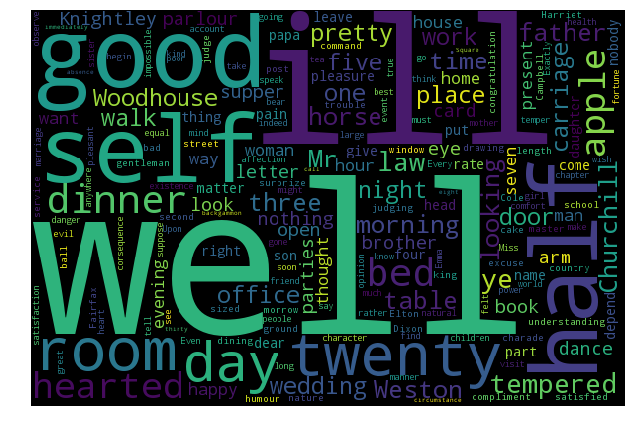

In [12]:
# visualizing our vocab with a word cloud.
from wordcloud import WordCloud
# Generate a word cloud image for positive reviews
str=''
for strings in vocab:
     str=str+strings+' '
polarity_pos_wordcloud = WordCloud(width=600, height=400).generate(str)
plt.figure( figsize=(9,9))
plt.imshow(polarity_pos_wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()

In [13]:
# vector of a particular model. note that it is 100 dimensional as specified.
w2v_model.wv.get_vector('little')

array([ 0.6028953 , -0.22087622,  0.01499481,  0.8131617 ,  0.3470787 ,
        0.6701381 ,  0.3125953 ,  0.7552484 , -0.16929741,  0.8152451 ,
       -0.39314833,  0.15997982, -0.2226672 ,  0.2543563 ,  0.19246784,
       -0.4390645 , -0.42079264,  0.02502489,  0.14374585,  0.03160761,
       -0.17361397, -0.42917314, -0.1880635 , -0.835098  ,  0.63575697,
       -0.07848139,  0.01568394,  0.15785018, -0.05813951,  0.8296168 ,
       -0.02963982, -0.17321059,  0.25950497, -0.35832137,  0.23534706,
       -0.3327884 , -0.4412709 , -0.24412107,  0.3897902 ,  0.71470594,
        0.0738868 , -0.06548045, -0.29305294, -0.725591  , -0.19626549,
        0.01842597, -0.29742277, -0.69856745, -0.3082293 , -0.35969484,
       -0.5177159 , -0.31063744,  0.14814007,  0.19296788, -0.3272636 ,
       -0.12574196,  0.64568937, -0.14635153, -0.6796842 ,  0.26811922,
       -0.2339509 , -0.34549838, -0.10264742, -0.82529265,  0.32422042,
        0.13754308, -0.09294911, -0.02831278,  0.3242104 , -0.00

In [14]:
# can also do like this.
w2v_model.wv.word_vec('Taylor')

array([ 0.2741521 ,  0.06209674,  0.21867356,  0.7478847 , -0.14268616,
        0.17908534, -0.09648934, -0.26747254,  0.26705024, -0.18023887,
       -0.19278076,  0.14381714, -0.474977  ,  0.43873993,  0.6285791 ,
       -0.25353676,  0.546851  ,  0.18378055, -0.61557144,  0.62995684,
        0.47792348, -0.5820097 , -0.05499927,  0.13401648, -0.00803937,
        0.31749132, -0.07104588,  0.17806245, -0.25222835,  0.03207391,
        0.24824546,  0.055531  , -0.29723835, -0.08876926,  0.07955522,
       -0.18737362, -0.4519069 , -0.00225898, -0.48074394,  0.44206288,
       -0.32624596, -0.1437433 ,  0.28862903,  0.06286547, -0.02588033,
       -0.47065428, -0.3042701 , -0.05493012,  0.1093695 , -0.3981523 ,
        0.37408778, -0.32762814,  0.50912887,  0.32577524,  0.07529917,
        0.28339362, -0.15227331, -0.04267459, -0.12190842, -0.03880327,
        0.2661838 ,  0.06669269, -0.23164202,  0.18953246, -0.54126126,
       -0.2411769 ,  0.41093788, -0.71554536,  0.1761508 , -0.36

In [15]:
# most similar words to a given word
w2v_model.wv.most_similar('Miss',topn=10)

# also u can use
#w2v_model.wv.similar_by_word('Miss',topn=5)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Bates', 0.7238761782646179),
 ('Nash', 0.721725583076477),
 ('niece', 0.7095468044281006),
 ('entreat', 0.6965023279190063),
 ('Taylor', 0.6875152587890625),
 ('Coxes', 0.67704838514328),
 ('Smith', 0.6769869923591614),
 ('Woodhouse.', 0.6655747294425964),
 ('hurried', 0.664979100227356),
 ('Ladies', 0.663745641708374)]

In [16]:
# simalarity between two words
w2v_model.wv.similarity('beloved','friend')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.45396334

In [17]:
# simalarity between two words. dissimilar words
w2v_model.wv.similarity('equal','gentle')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.5614887

In [18]:
# simalarity between two words
w2v_model.wv.similarity('equal','equal')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


1.0000001

In [19]:
# saving the model
w2v_model.save('w2v_model.pickle')
model = Word2Vec.load('w2v_model.pickle')

# summary of the word2vec model
print(model)
print(w2v_model)

# save_word2vec_format can also be used.

Word2Vec(vocab=8344, size=100, alpha=0.025)
Word2Vec(vocab=8344, size=100, alpha=0.025)


In [0]:
# visualizing using t-SNE

In [0]:
embed_matrix=[]
for word in vocab:
  embed_matrix.append(w2v_model.wv.get_vector(word))
  

In [22]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
T = tsne.fit_transform(embed_matrix)
 
import plotly.plotly as py
import plotly.graph_objs as go

import plotly.plotly as py
py.sign_in('mrc03', 'V3rVgtDnmk7m6JVkizOa')
 
# Create a trace
trace = go.Scatter(
    x = T[:,0],
    y = T[:,1],
    mode ='markers',
    text=list(w2v_model.wv.vocab)
)

data = [trace]

# Plot and embed in ipython notebook!
py.iplot(data, filename='basic-scatter')



High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~mrc03/0 or inside your plot.ly account where it is named 'basic-scatter'
